In [1]:
import numpy as np
import matplotlib.pylab as plt
import os
os.chdir('../')

In [2]:
### import methods
from src.tensor_data_analysis.cp_decomposition import cp_decomposition_als
from src.tensor_data_analysis.reconstruction import reconst_tensor_cp

### matplotlib's settings
rcParams_dict = {
    'font.family':'Times New Roman',
    'mathtext.fontset':'stix',
    'font.size':15,
    'xtick.direction':'in',
    'ytick.direction':'in',
    'axes.linewidth':1.5,
    'xtick.major.size':8,
    'ytick.major.size':8,
    }
for key in rcParams_dict.keys(): plt.rcParams[str(key)] = rcParams_dict[str(key)]

In [3]:
def plot_3order_tensor(Tensor, title=None, aspect='equal', size=1, alpha=1, cmap='inferno_r', cmap_range=[None, None], colorbar=False):
    x, y, z = np.indices(Tensor.shape)
    values = Tensor.flatten()
    x = x.flatten()
    y = y.flatten()
    z = z.flatten()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d', aspect=aspect)
    ax.set_title(title)
    sc = ax.scatter(x, y, z, c=values, vmin=cmap_range[0], vmax=cmap_range[1], s=size, alpha=alpha, cmap=cmap)
    ax.set_xlabel('1st mode', labelpad=-10)
    ax.set_ylabel('2nd mode', labelpad=-10)
    ax.set_zlabel('3rd mode', labelpad=-10)
    ax.set_xlim([0, Tensor.shape[0]])
    ax.set_ylim([0, Tensor.shape[1]])
    ax.set_zlim([0, Tensor.shape[2]])
    if colorbar==True: plt.colorbar(sc, ax=ax)
    ax.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)        
    plt.show()

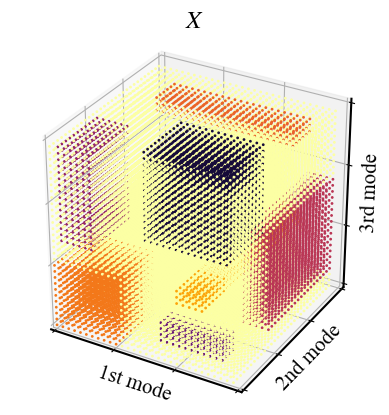

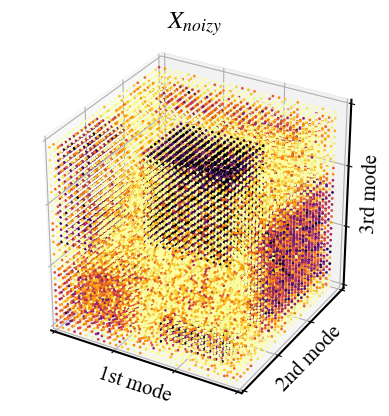

In [4]:
### generate data
X = np.zeros((30, 30, 30))
X[0:11, 0:11, 0:11] = 30
X[15:26, 4:8, 0:4] = 70
X[25:31, 10:31, 3:19] = 50
X[5:28, 20:26, 27:31] = 35
X[0:6, 2:13, 13:29] = 60
X[12:26, 5:16, 15:31] = 90
X[20:25, 0:31, 10:13] = 20
X_noizy = X + np.random.randn(X.shape[0], X.shape[1], X.shape[2])*20

plot_3order_tensor(X, r'$X$', cmap_range=[0, 100])
plot_3order_tensor(X_noizy, r'$X_{noizy}$', cmap_range=[0, 100])

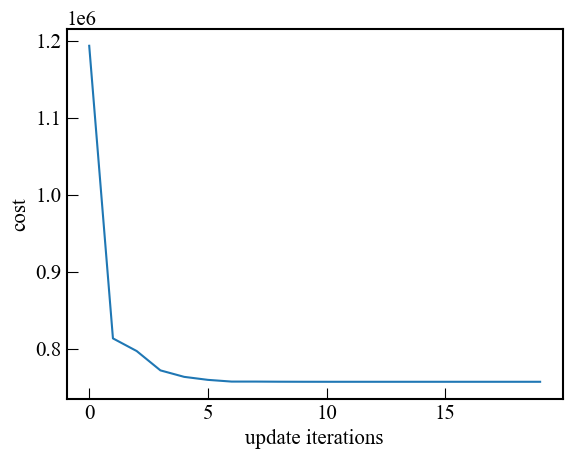

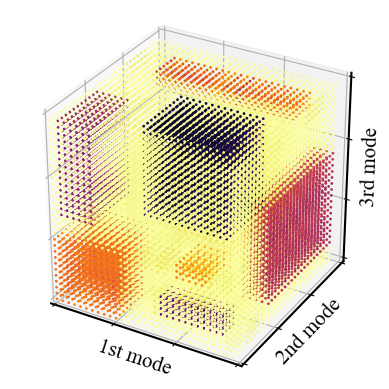

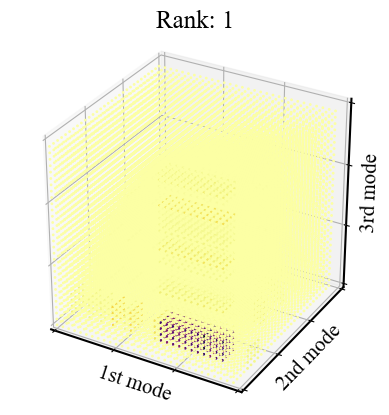

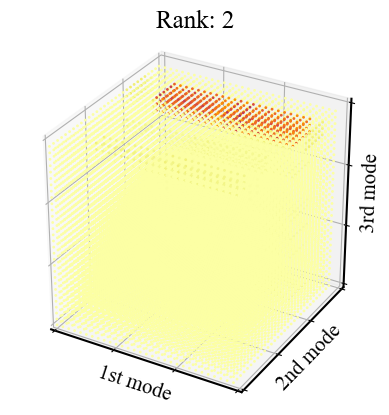

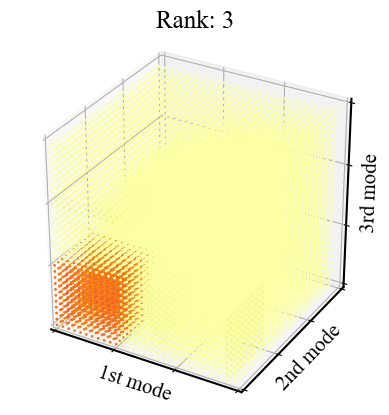

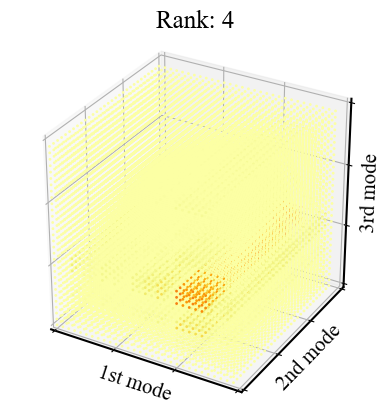

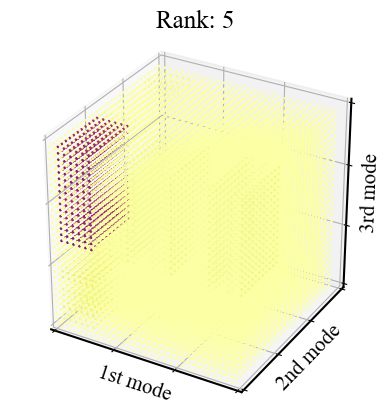

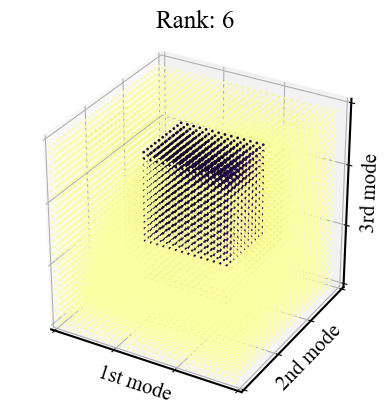

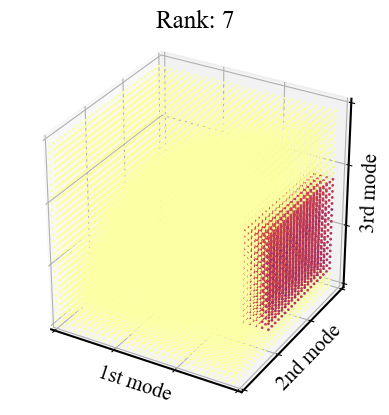

In [6]:
R_hat = 7
max_iter = 20
A_hat, X_hat, cost = cp_decomposition_als(X_noizy, R_hat, max_iter, non_negative=True, random_seed=8)

plt.plot(cost)
plt.xlabel('update iterations')
plt.ylabel('cost')
plt.show()

plot_3order_tensor(X_hat, cmap_range=[0, 100])

(A, B, C) = A_hat
for rank in range(R_hat):
    X_recon = reconst_tensor_cp([A[:, rank:rank+1], B[:, rank:rank+1], C[:, rank:rank+1]])
    plot_3order_tensor(X_recon, 'Rank: '+str(rank+1), cmap_range=[0, 100])